# Curso de Clustering con Python y scikit-learn

En este artículo, exploraremos cómo realizar **clustering** utilizando **Python** y la biblioteca **Scikit-learn**. El clustering es una técnica de **aprendizaje no supervisado** que permite agrupar datos similares en conjuntos, revelando **patrones y estructuras ocultas** en los datos. Aprenderemos cómo utilizar Scikit-learn para llevar a cabo el clustering, desde la **preparación de los datos** hasta la **evaluación de los resultados** obtenidos. Descubre cómo esta combinación de herramientas puede ayudarte a obtener **información valiosa** a partir de tus datos.

<img src='https://www.wordstream.com/wp-content/uploads/2021/07/machine-learning.png' width=700>


Estos son los requisitos previos que se necesitan para abordar el Clustering con Python:

- [Conocimiento de matemáticas para la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-a-Funciones-Matematicas-para-Data-Science-e-Inteligencia-Artificial-f9a47b52-0308-4e95-a3d3-c3de3ef7b14f)

- [Conocimiento de análisis exploratorio de datos.](https://deepnote.com/@mazzaroli/Analisis-exploratorio-de-datos-caba7762-e435-481e-9060-523263a820b1)

- Conocimiento de visualización de datos con [Matplotlib](https://matplotlib.org/stable/users/index.html) y [Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html).

- [Conocimiento de los fundamentos de la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-teorica-al-machine-learning-c4aded88-a409-4731-b650-6b3b43963d21)


## ¿Qué es el clustering en machine learning?

**El clustering** es una técnica de aprendizaje automático **no supervisado** que se utiliza para **agrupar datos** en función de sus **similitudes**. En lugar de buscar una relación de entrada y salida específica, el clustering busca **identificar patrones o estructuras ocultas** en un conjunto de datos sin etiquetas predefinidas.

El objetivo principal del clustering es **descubrir grupos o clústeres** dentro de los datos, donde las muestras dentro de un mismo clúster son más similares entre sí que con las muestras de otros clústeres. Esto permite encontrar estructuras inherentes en los datos sin la necesidad de tener información previa sobre las clases o categorías a las que pertenecen.

El clustering tiene una amplia gama de aplicaciones en diversos campos, como el análisis de datos, la segmentación de clientes, el procesamiento de imágenes y la bioinformática. Al identificar grupos o patrones dentro de los datos, el clustering permite **descubrir información valiosa**, realizar **segmentaciones significativas** y obtener una **mejor comprensión de los datos.**


### Diferencias entre el aprendizaje supervisado y no supervisado

El aprendizaje supervisado y no supervisado son dos enfoques distintos en el campo del aprendizaje automático:

**Aprendizaje supervisado:**

- Requiere un conjunto de datos etiquetados, donde cada muestra tiene una entrada y una salida deseada.
- El objetivo principal es aprender una función o modelo que pueda mapear las entradas a las salidas correctas.
- Se utiliza para problemas de clasificación y regresión, donde se busca predecir la clase o el valor numérico de una nueva muestra.
- Se enfoca en la relación de entrada-salida y en la capacidad de generalización del modelo para predecir nuevos datos.
- El algoritmo se entrena utilizando ejemplos conocidos, lo que implica una supervisión explícita del proceso de aprendizaje.

**Aprendizaje no supervisado:**

- No requiere datos etiquetados, ya que el conjunto de entrenamiento consiste únicamente en entradas sin salidas deseadas asociadas.
- El objetivo principal es descubrir patrones, estructuras ocultas o características intrínsecas en los datos sin etiquetas.
- Se utiliza para técnicas como el clustering, donde se busca agrupar los datos en función de su similitud.
- No se enfoca en predecir salidas específicas, sino en explorar y comprender los datos subyacentes.
- El algoritmo encuentra patrones emergentes o características comunes en los datos sin requerir una guía externa.

## Tu primer clustering con scikit-learn

Utilizaremos el **conjunto de datos** generado por la función **make_blobs** de scikit-learn para realizar nuestro primer clustering. Este conjunto de **datos sintético** nos permite experimentar con algoritmos de clustering y comprender la estructura de los clústeres.

[Para ver cómo funciona **make_blobs**, lee la documentación.](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [2]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pylab as plt

In [30]:
x,y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

# n_samples: Es el número total de muestras o puntos a generar.
# n_features: Es el número de características o dimensiones de cada muestra.
# centers: Es el número de clústeres que se desean generar, o una matriz con las coordenadas de los centroides de los clústeres.
# cluster_std: Es la desviación estándar de cada clúster. Cuanto mayor sea el valor, mayor será la dispersión de los puntos dentro de cada clúster.
# random_state: Es una semilla para la generación aleatoria de los datos.

In [31]:
(x,y)

(array([[ -3.38426057,   5.22173974],
        [ -1.83623836,  -7.73538367],
        [ -7.45617621,   6.19887436],
        [ -1.78504307,   1.60974874],
        [-10.1249098 ,   6.1338052 ],
        [  1.0146433 ,   4.0453507 ],
        [ -0.70092735,  -6.98196818],
        [  8.99757441,  -2.30228718],
        [ -7.9192539 ,   5.72225675],
        [  1.9445622 ,  -7.43742299],
        [ -0.93442649,  -7.78820426],
        [ 11.48819121,   1.33719026],
        [ -2.86067816, -11.24623446],
        [ -7.90577233,   4.84553865],
        [ -2.24228315,   4.38550238],
        [  0.56928691, -10.0571088 ],
        [  0.6237701 ,  -6.12033956],
        [  8.32594634,   0.04535295],
        [ -2.11937574, -10.1833945 ],
        [ -6.70767333,   5.26896209],
        [ -2.52855036,   5.03085908],
        [ -8.19937429,   4.07185131],
        [ -8.86097416,   7.62744807],
        [  0.25552915, -12.26658908],
        [  7.09274235,   1.13571881],
        [ -8.51922024,   4.14769715],
        [  9

In [32]:
df_blobs = pd.DataFrame({
    "x1": x[:,0],
    "x2": x[:,1],
    'y': y
})

In [33]:
df_blobs

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


**La variable objetivo (Y)** se utilizará únicamente para **verificar la precisión de los resultados** del clustering, ya que esta **no es una tarea de clasificación**, sino de agrupamiento o clusterización.

In [71]:
def plot_2d_cluster(x,y,ax):
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title=f'{len(y_uniques)} Clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker=f'${_}$',
            s=50,
            ax = ax
        )

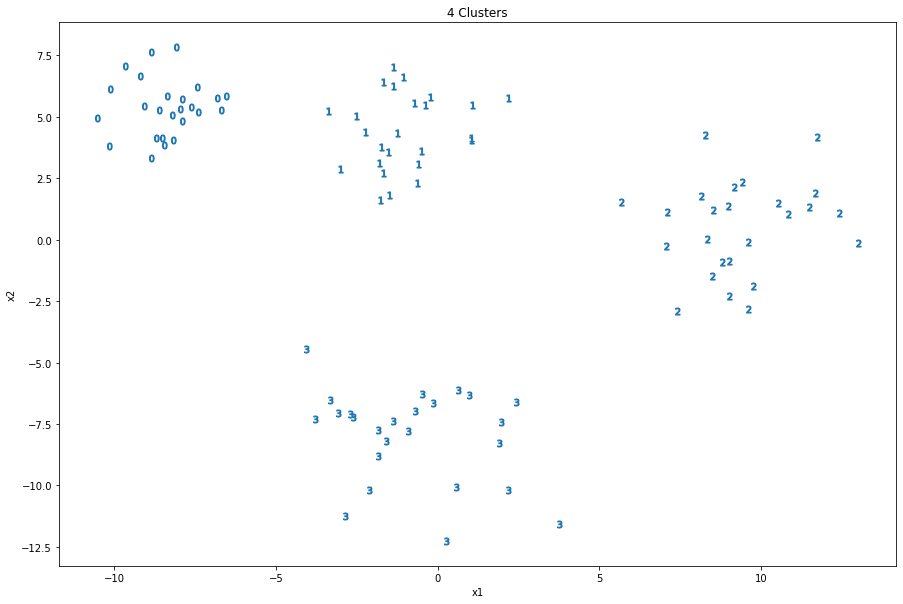

In [72]:
fig,ax = plt.subplots(1,1, figsize=(15,10))

x,y = df_blobs[['x1','x2']], df_blobs['y'] 

plot_2d_cluster(x,y,ax)

Graficamos la dispersión de los datos del conjunto X para visualizar su distribución en el gráfico. El algoritmo no conoce los clústeres todavia, pero esto nos permite identificarlos visualmente de una forma sencilla a simple vista. 

Ahora procederemos a escribir el código para realizar la clusterización.

### Aplicando clustering

La función KMeans de scikit-learn implementa el algoritmo K-Means para realizar la clusterización.

Funciona iterativamente asignando cada muestra al clúster más cercano y ajustando los centroides de los clústeres en función de las muestras asignadas. El objetivo es minimizar la suma de las distancias cuadradas entre las muestras y los centroides de sus clústeres correspondientes.

[documentación KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


In [73]:
from sklearn.cluster import KMeans

In [74]:
kmeans = KMeans(n_clusters=4, random_state=7 )

In [75]:
y_pred = kmeans.fit_predict(x)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f227b54b8b0>
Traceback (most recent call last):
  File "/home/mazzaroli/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mazzaroli/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mazzaroli/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mazzaroli/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.

Text(0.5, 1.0, 'KMeans 4 Clusters')

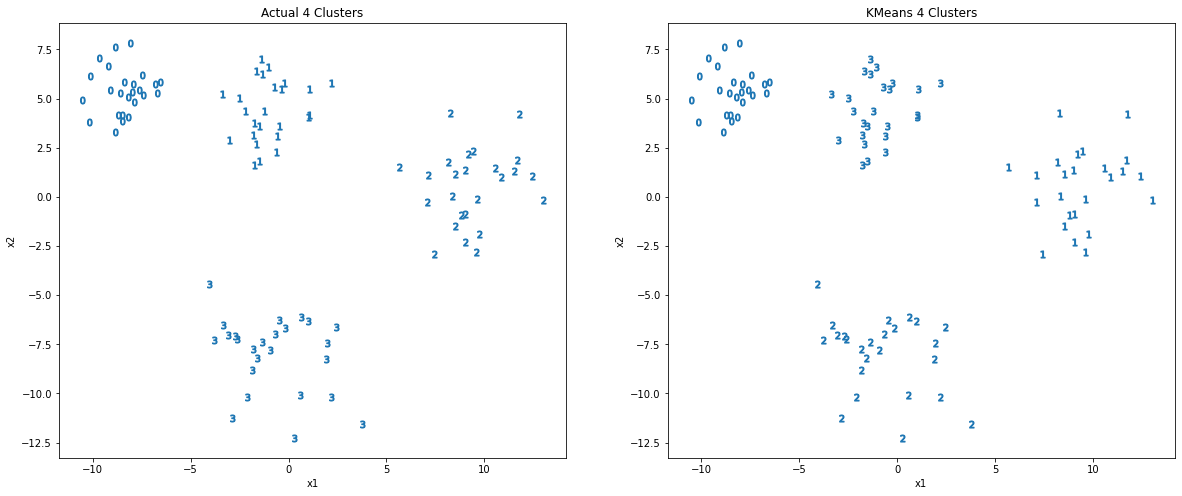

In [76]:
fig,ax = plt.subplots(1,2, figsize=(20,8))

plot_2d_cluster(x,y_pred,ax[1])

# plot_2d_cluster(x,y,ax[0])
ax[0].set_title(f'Actual {ax[0].get_title()}')
ax[1].set_title(f'KMeans {ax[1].get_title()}')

Nuestro modelo de clusterización ha **segmentado correctamente los datos**. No es necesario preocuparse por que las **etiquetas de los clústeres en el gráfico actual no coincidan** con las asignadas por el modelo KMeans. Lo importante es que los **grupos hayan sido separados correctamente**, ya que en el aprendizaje no supervisado no tenemos etiquetas predefinidas. La evaluación del rendimiento se basa en la **coherencia y la calidad de la separación de los grupos**, en lugar de las etiquetas específicas asignadas.

## ¿Cuándo usar clustering?


- **Mayor contexto:** El clustering es útil cuando se busca obtener una visión general y un mayor contexto sobre los datos. Permite identificar patrones, estructuras y relaciones ocultas que podrían no ser evidentes a simple vista. Es útil para explorar y comprender la naturaleza de los datos.

- **Detección de outliers:** El clustering puede ser utilizado para detectar outliers o valores atípicos en un conjunto de datos. Los outliers son muestras que difieren significativamente del resto de los datos y pueden indicar comportamientos anómalos o errores. Al agrupar los datos, los outliers pueden ser identificados como muestras que no se asignan a ningún clúster o como muestras en clústeres pequeños o solitarios.

- **Clasificar/agrupar (sin variable objetivo):** El clustering es útil cuando no se dispone de una variable objetivo o etiquetas predefinidas. Permite agrupar las muestras en función de su similitud y crear grupos coherentes sin necesidad de información externa. Es especialmente útil en casos donde se desea explorar la estructura subyacente de los datos y encontrar agrupaciones naturales sin tener una tarea de clasificación específica.

- **Tareas manuales de crear etiquetas:** El clustering puede ser utilizado en tareas donde se requiere crear etiquetas o categorías manualmente. Por ejemplo, en la organización de documentos o en la segmentación de clientes, se pueden utilizar algoritmos de clustering para agrupar los datos y luego asignar manualmente etiquetas o categorías a cada grupo. Esto facilita la tarea de clasificación y organización de los datos de manera más eficiente.

### Qué puedo lograr?

- **Clasificación de tráfico en una página:** El clustering se puede utilizar para analizar el tráfico de una página web y clasificar a los visitantes en diferentes segmentos según su comportamiento y características. Esto permite comprender mejor el perfil de los usuarios y adaptar estrategias de marketing y personalización.

- **Segmentación de clientes por perfil:** El clustering es útil en el campo del marketing para segmentar clientes en grupos o segmentos homogéneos según sus características demográficas, comportamientos de compra u otras variables relevantes. Esto permite adaptar estrategias de marketing específicas para cada segmento y mejorar la experiencia del cliente.

- **Clasificación de contenido:** El clustering se puede aplicar para organizar grandes volúmenes de contenido, como noticias, documentos o redes sociales, en grupos temáticos. Esto facilita la búsqueda y navegación, así como la recomendación de contenido relevante a los usuarios.

- **Identificar comportamientos fraudulentos:** El clustering puede ser utilizado para detectar comportamientos fraudulentos o anómalos en transacciones financieras, actividades en línea o cualquier otro tipo de datos. Al agrupar los datos, se pueden identificar patrones inusuales que podrían indicar actividades sospechosas o fraudulentas.

- **Ciencia en los deportes:** El clustering se aplica en la ciencia del deporte para analizar datos de rendimiento de los atletas e identificar patrones o perfiles de rendimiento. Esto permite comprender mejor las fortalezas y debilidades de los atletas, así como tomar decisiones basadas en datos para mejorar el rendimiento y prevenir lesiones.

En general, el clustering ofrece muchas posibilidades en diferentes áreas, como marketing, seguridad, recomendación de contenido, deportes y más. Su capacidad para identificar patrones y agrupar datos similares proporciona una herramienta poderosa para obtener información valiosa y tomar decisiones informadas en diversos contextos.

### Clasificacion y clustering

| **Clasificación**                    | **Clustering**                     |
|--------------------------------------|------------------------------------|
| Con variable objetivo.               | Sin variable objetivo.             |
| Más complejo                         | Menos complejo                     |
| Data de entrenamiento / test         | Un solo set de datos.              |
| Asignar datos a determinada clase    | Encontrar similitudes en los datos |
| Se conoce la cantidad de clases      | Se desconoce la cantidad de grupos |
| Dos fases (entrenamiento-predicción) | Una fase                           |

## ¿Cómo evaluar modelos de clustering?

La evaluación de un modelo de clustering se realiza mediante métricas que miden la calidad de la agrupación y la coherencia de los resultados. Algunas de las métricas comunes para evaluar la calidad de un modelo de clustering son las siguientes:


### Coeficiente de silueta (Silhouette coefficient)

**El coeficiente de silueta** es una **métrica popular** para evaluar la calidad de un clustering. Calcula la **distancia media** entre una muestra y los otros puntos dentro de su propio clúster, en comparación con la **distancia media** entre la muestra y los puntos en el clúster más cercano. Un valor de coeficiente de silueta **cercano a 1 indica una buena separación** de los clústeres, mientras que un valor **cercano a -1 indica que las muestras se han asignado incorrectamente**. Un valor **cercano a 0 sugiere superposición de clústeres.**

Formula:

$\displaystyle s(i) =\displaystyle \frac{b-a}{max(a,b)}$

Donde:

- Para cada muestra, se calcula la distancia media $(a)$ entre esa muestra y todas las demás muestras en el mismo clúster.

- Luego, se calcula la distancia media más cercana $(b)$ entre esa muestra y todas las muestras en el clúster más cercano (distinto del clúster al que pertenece la muestra).

- El coeficiente de silueta para cada muestra se calcula utilizando la fórmula: $silueta = (b - a) / max(a, b)$. El coeficiente de silueta varía en el rango de -1 a 1, donde un valor más alto indica una mejor separación entre los clústeres y una asignación más adecuada de las muestras.

- Finalmente, se calcula el coeficiente de silueta promedio para todo el conjunto de datos, tomando el promedio de los coeficientes de silueta individuales.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_002.png' width=1000>

[Vídeo explicativo](https://www.youtube.com/watch?v=u1EUrxobvk8)

# K-means

## ¿Qué es el algoritmo de K-means y cómo funciona?

### ¿Qué es?

El algoritmo de K-means es un algoritmo de agrupamiento o clustering utilizado para dividir un conjunto de datos en grupos o clústeres basándose en sus similitudes. Es uno de los algoritmos de clustering más comunes y ampliamente utilizados. 

Se basa en la idea de que los puntos de datos en un espacio n-dimensional pueden agruparse en k clústeres, donde k es un número predefinido. El objetivo es minimizar la suma de las distancias cuadradas entre cada punto de datos y el centroide de su clúster asignado.

El algoritmo comienza seleccionando k centroides iniciales de manera aleatoria o utilizando algún método heurístico. Luego, itera en dos pasos hasta converger:

- Asignación de puntos: cada punto de datos se asigna al centroide más cercano en función de la distancia euclidiana u otra medida de similitud.

- Actualización de centroides: los centroides se recalculan como el centroide promedio de todos los puntos asignados a ese clúster.

Estos pasos se repiten hasta que los centroides converjan y no haya cambios en la asignación de puntos a los clústeres. En ese momento, se considera que el algoritmo ha convergido y se obtiene una solución.

<img src='https://miro.medium.com/v2/resize:fit:1400/1*ucaF8Sgo9Bx95Oxxe_Xvig.gif' width=500>

En cuanto a la eficiencia computacional, el algoritmo de K-means puede ser costoso en términos de tiempo de ejecución y uso de recursos computacionales, especialmente cuando se aplica a grandes conjuntos de datos o cuando se requieren muchos clústeres. El costo computacional aumenta linealmente con el número de puntos de datos y el número de iteraciones necesarias para converger.

Sin embargo, existen variantes y optimizaciones del algoritmo de K-means que ayudan a mejorar su eficiencia, como la inicialización inteligente de centroides, la reducción de la dimensionalidad o la paralelización del algoritmo en sistemas distribuidos. Estas técnicas pueden ayudar a mitigar los costos computacionales y hacer que el algoritmo sea más práctico para aplicaciones en tiempo real o con grandes volúmenes de datos.



### ¿Cómo funciona?
- **Indicar cantidad de clusters:** Se especifica el número de clústeres que se desea obtener a partir de los datos. Este valor se establece antes de ejecutar el algoritmo.

- **Ubicar centroides aleatoriamente:** Se seleccionan aleatoriamente K centroides iniciales, donde K es el número de clústeres especificado en el paso anterior. Los centroides son puntos representativos que se utilizan como referencia para la formación de los clústeres.

- **Asignar puntos a los centroides más cercanos:** Cada punto del conjunto de datos se asigna al centroide más cercano en función de su distancia. Se utilizan medidas de distancia, como la distancia euclidiana, para calcular la proximidad entre los puntos y los centroides.

- **Recalcular centroides con el promedio:** Se recalcula la posición de cada centroide tomando el promedio de las posiciones de todos los puntos asignados a ese centroide. Este paso actualiza la ubicación de los centroides en función de los puntos que les han sido asignados.

- **Repetir los pasos 3 y 4 hasta que no se muevan los centroides:** Los pasos 3 y 4 se repiten iterativamente hasta que los centroides ya no se muevan o hasta que se alcance un criterio de convergencia predefinido. En cada iteración, los puntos se reasignan a los centroides más cercanos y los centroides se recalculan. Este proceso continúa hasta que se alcanza la estabilidad, es decir, cuando los centroides no se mueven significativamente o cuando se alcanza un número máximo de iteraciones.

Formula K-Means:


$\displaystyle j=\sum^{k}_{j=1}\sum^{n}_{i=1}||x_i^{j}-c_j||^{2}$

- $j$ es la variable que indica el **índice del clúster**, y se suma desde 1 hasta $k$, donde $k$ es el número total de clústeres.

- $n$ es la variable que indica el **índice del punto de datos**, y se suma desde 1 hasta $n$, donde $n$ es el número total de puntos de datos.

- $x_i^j$ representa el **punto de datos** $i$ en el clúster $j$. Aquí, $i$ varía de 1 a $n$, y $j$ varía de 1 a $k$.

- $c_j$ es el **centroide del clúster** $j$. Los centroides son puntos que representan el centro o la posición promedio de todos los puntos de datos asignados a ese clúster.

- $||x_i^j - c_j||^2$ representa la **distancia euclidiana al cuadrado entre el punto de datos $x_i^j$ y el centroide $c_j$**. La distancia euclidiana es una medida común utilizada para calcular la similitud o la distancia entre dos puntos en un espacio n-dimensional. Elevar al cuadrado la distancia euclidiana es una elección común en el algoritmo de K-means debido a su simplicidad y propiedades matemáticas.